<a href="https://colab.research.google.com/github/aryangaikwad-12max/Leukemia-Predictor/blob/main/Predictive_Leukemia_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving cbc_leukemia_dataset.csv to cbc_leukemia_dataset.csv


In [3]:
import pandas as pd

# Load the CSV (filename must match exactly)
df = pd.read_csv("cbc_leukemia_dataset.csv")

# Preview it
df.head()



,subject_id,Hemoglobin,Eosinophils,Lymphocytes,Monocytes,Basophils,Eosinophils.1,Hematocrit,Hemoglobin.1,Lymphocytes.1,...,Eosinophils.3,Lymphocytes.4,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,short_title,long_title
0,10006,NaN,NaN,NaN,NaN,0.3,1.95,33.811111,11.133333,15.85,...,NaN,NaN,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,Sepsis,Sepsis
1,10006,NaN,NaN,NaN,NaN,0.3,1.95,33.811111,11.133333,15.85,...,NaN,NaN,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,React-oth vasc dev/graft,Infection and inflammatory reaction due to oth...
2,10006,NaN,NaN,NaN,NaN,0.3,1.95,33.811111,11.133333,15.85,...,NaN,NaN,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,Hyp kid NOS w cr kid V,"Hypertensive chronic kidney disease, unspecifi..."
3,10006,NaN,NaN,NaN,NaN,0.3,1.95,33.811111,11.133333,15.85,...,NaN,NaN,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,Atrial fibrillation,Atrial fibrillation
4,10006,NaN,NaN,NaN,NaN,0.3,1.95,33.811111,11.133333,15.85,...,NaN,NaN,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,CHF NOS,"Congestive heart failure, unspecified"


In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [6]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 2: Load the Uploaded Dataset
df = pd.read_csv("cbc_leukemia_dataset.csv")

# ✅ Step 3: Create a binary label: leukemia (1 if 'leukemia' in diagnosis, else 0)
df['leukemia'] = df['long_title'].str.contains('leukemia', case=False, na=False).astype(int)

# ✅ Step 4: Drop unnecessary columns
df = df.drop(columns=['subject_id', 'dob', 'dod', 'dod_hosp', 'dod_ssn', 'short_title', 'long_title'])

# ✅ Step 5: Drop duplicate columns like 'Hemoglobin.1'
df = df.loc[:, ~df.columns.str.contains(r'\.\d$', regex=True)]

# ✅ Step 6: Encode 'gender' as numeric
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

# ✅ Step 7: Handle missing values
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(0)

# ✅ Step 8: Split into features and labels
X = df.drop(columns=['leukemia'])
y = df['leukemia']

# ✅ Step 9: Check class balance
print("Leukemia label counts:\n", y.value_counts())

# ✅ Step 10: Handle class imbalance (optional but recommended)
from sklearn.utils import resample
data = pd.concat([X, y], axis=1)
df_majority = data[data.leukemia == 0]
df_minority = data[data.leukemia == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])
X_bal = df_balanced.drop(columns=['leukemia'])
y_bal = df_balanced['leukemia']

# ✅ Step 11: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

# ✅ Step 12: Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ✅ Step 13: Evaluate the model
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ✅ Step 14: Check how many leukemia cases were predicted
predicted_leukemia_count = np.sum(y_pred)
print(f"\n🔍 Total Predicted Leukemia Cases in Test Set: {predicted_leukemia_count}")


Leukemia label counts:
 leukemia
0    1443
1       2
Name: count, dtype: int64
✅ Accuracy: 0.986159169550173

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       289
           1       0.97      1.00      0.99       289

    accuracy                           0.99       578
   macro avg       0.99      0.99      0.99       578
weighted avg       0.99      0.99      0.99       578

✅ Confusion Matrix:
 [[281   8]
 [  0 289]]

🔍 Total Predicted Leukemia Cases in Test Set: 297


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hemoglobin         1445 non-null   float64
 1   Eosinophils        1445 non-null   float64
 2   Lymphocytes        1445 non-null   float64
 3   Monocytes          1445 non-null   float64
 4   Basophils          1445 non-null   float64
 5   Hematocrit         1445 non-null   float64
 6   MCH                1445 non-null   float64
 7   MCHC               1445 non-null   float64
 8   MCV                1445 non-null   float64
 9   Neutrophils        1445 non-null   float64
 10  RDW                1445 non-null   float64
 11  Red Blood Cells    1445 non-null   float64
 12  White Blood Cells  1445 non-null   float64
 13  gender             1445 non-null   int64  
 14  expire_flag        1445 non-null   int64  
 15  leukemia           1445 non-null   int64  
dtypes: float64(13), int64(3)

In [8]:
# ✅ Sample CBC values - Change these based on actual test values
custom_input = {
    'Hemoglobin': 11.2,
    'Eosinophils': 0.3,
    'Lymphocytes': 18.0,
    'Monocytes': 6.0,
    'Basophils': 0.2,
    'Hematocrit': 34.5,
    'MCH': 29.2,
    'MCHC': 33.8,
    'MCV': 87.1,
    'Neutrophils': 70.0,
    'RDW': 14.5,
    'Red Blood Cells': 4.2,
    'White Blood Cells': 11.3,
    'gender': 0  # 0 for Male, 1 for Female
}

# Convert to DataFrame
custom_df = pd.DataFrame([custom_input])


In [9]:
# Make sure all required columns are present
missing_cols = set(X_train.columns) - set(custom_df.columns)
for col in missing_cols:
    custom_df[col] = 0  # Add missing columns with default value 0

# Ensure column order matches
custom_df = custom_df[X_train.columns]


In [10]:
# Predict leukemia
prediction = clf.predict(custom_df)[0]
confidence = clf.predict_proba(custom_df)[0][1]

print("\n🧠 Prediction:", "Leukemia (1)" if prediction == 1 else "Not Leukemia (0)")
print(f"📊 Prediction Confidence (Leukemia): {confidence * 100:.2f}%")



🧠 Prediction: Not Leukemia (0)
📊 Prediction Confidence (Leukemia): 2.96%


In [11]:
# Step 1: Create a test sample based on image
custom_input = {
    'Hemoglobin': 10.1,
    'Eosinophils': 0.3,
    'Lymphocytes': 1.4,
    'Monocytes': 31.12,
    'Basophils': 0.0,
    'Hematocrit': 16.6,
    'MCH': 28.08,
    'MCHC': 32.57,
    'MCV': 86.33,
    'Neutrophils': 76.2,
    'RDW': 17.03,
    'Red Blood Cells': 3.60,
    'White Blood Cells': 6.58,
    'gender': 1  # Female
}

# Step 2: Convert to DataFrame
custom_df = pd.DataFrame([custom_input])

# Step 3: Match columns with training set
missing_cols = set(X_train.columns) - set(custom_df.columns)
for col in missing_cols:
    custom_df[col] = 0
custom_df = custom_df[X_train.columns]

# Step 4: Predict
prediction = clf.predict(custom_df)[0]
confidence = clf.predict_proba(custom_df)[0][1]

# Step 5: Output
print("\n🧪 CBC Input Based on Image:")
print(custom_df.T)

print("\n🧠 Prediction:", "Leukemia (1)" if prediction == 1 else "Not Leukemia (0)")
print(f"📊 Confidence (Leukemia): {confidence * 100:.2f}%")



🧪 CBC Input Based on Image:
                       0
Hemoglobin         10.10
Eosinophils         0.30
Lymphocytes         1.40
Monocytes          31.12
Basophils           0.00
Hematocrit         16.60
MCH                28.08
MCHC               32.57
MCV                86.33
Neutrophils        76.20
RDW                17.03
Red Blood Cells     3.60
White Blood Cells   6.58
gender              1.00
expire_flag         0.00

🧠 Prediction: Not Leukemia (0)
📊 Confidence (Leukemia): 0.00%


In [12]:
# ⚙️ Custom CBC Input from Subject ID 1443
custom_input = {
    'Eosinophils': 0.3,
    'Lymphocytes': 1.4,
    'Hematocrit': 31.11666667,
    'Hemoglobin': 10.1,
    'Hemoglobin.1': 16.6,
    'Lymphocytes.1': 28.08333333,
    'MCH': 32.56666667,
    'MCV': 86.33333333,
    'Monocytes': 5.5,
    'Neutrophils': 76.2,
    'RDW': 17.03333333,
    'Red Blood Cells': 3.603333333,
    'White Blood Cells': 6.583333333,
    'gender': 1  # Female (0=Male, 1=Female)
}

# ✅ Create dataframe
custom_df = pd.DataFrame([custom_input])

# ✅ Add missing columns if any
missing_cols = set(X_train.columns) - set(custom_df.columns)
for col in missing_cols:
    custom_df[col] = 0

# ✅ Ensure column order matches model input
custom_df = custom_df[X_train.columns]

# ✅ Make prediction
prediction = clf.predict(custom_df)[0]
confidence = clf.predict_proba(custom_df)[0][1]

# ✅ Display results
print("\n🧪 CBC Test Input (ID: 1443):")
print(custom_df.T)

print("\n🧠 Prediction:", "Leukemia (1)" if prediction == 1 else "Not Leukemia (0)")
print(f"📊 Confidence (Leukemia): {confidence * 100:.2f}%")



🧪 CBC Test Input (ID: 1443):
                           0
Hemoglobin         10.100000
Eosinophils         0.300000
Lymphocytes         1.400000
Monocytes           5.500000
Basophils           0.000000
Hematocrit         31.116667
MCH                32.566667
MCHC                0.000000
MCV                86.333333
Neutrophils        76.200000
RDW                17.033333
Red Blood Cells     3.603333
White Blood Cells   6.583333
gender              1.000000
expire_flag         0.000000

🧠 Prediction: Not Leukemia (0)
📊 Confidence (Leukemia): 0.99%


In [13]:
# Simulated Leukemia CBC Input
leukemia_input = {
    'Hemoglobin': 6.5,
    'Eosinophils': 0.2,
    'Lymphocytes': 20.0,
    'Monocytes': 15.0,
    'Basophils': 0.1,
    'Hematocrit': 20.0,
    'MCH': 25.0,
    'MCHC': 30.0,
    'MCV': 88.0,
    'Neutrophils': 5.0,
    'RDW': 18.0,
    'Red Blood Cells': 2.0,
    'White Blood Cells': 50.0,
    'gender': 0  # Male
}

# Create dataframe
leukemia_df = pd.DataFrame([leukemia_input])

# Match with training data
missing_cols = set(X_train.columns) - set(leukemia_df.columns)
for col in missing_cols:
    leukemia_df[col] = 0
leukemia_df = leukemia_df[X_train.columns]

# Predict
prediction = clf.predict(leukemia_df)[0]
confidence = clf.predict_proba(leukemia_df)[0][1]

# Output
print("\n🧪 Simulated Leukemia-Positive CBC:")
print(leukemia_df.T)
print("\n🧠 Prediction:", "Leukemia (1)" if prediction == 1 else "Not Leukemia (0)")
print(f"📊 Confidence (Leukemia): {confidence * 100:.2f}%")



🧪 Simulated Leukemia-Positive CBC:
                      0
Hemoglobin          6.5
Eosinophils         0.2
Lymphocytes        20.0
Monocytes          15.0
Basophils           0.1
Hematocrit         20.0
MCH                25.0
MCHC               30.0
MCV                88.0
Neutrophils         5.0
RDW                18.0
Red Blood Cells     2.0
White Blood Cells  50.0
gender              0.0
expire_flag         0.0

🧠 Prediction: Not Leukemia (0)
📊 Confidence (Leukemia): 18.73%


In [ ]:
df['leukemia'].value_counts()


,count
leukemia,
0,1443
1,2


In [18]:
# Simulated Leukemia CBC Input
leukemia_input = {
    'Hemoglobin': 6,
    'Eosinophils': 0.2,
    'Lymphocytes': 45.0,
    'Monocytes': 15.0,
    'Basophils': 0.1,
    'Hematocrit': 20.0,
    'MCH': 25.0,
    'MCHC': 30.0,
    'MCV': 88.0,
    'Neutrophils': 5.0,
    'RDW': 22.0,
    'Red Blood Cells': 2.3,
    'White Blood Cells': 120.0,
    'gender': 0  # Male
}

# Create dataframe
leukemia_df = pd.DataFrame([leukemia_input])

# Match with training data
missing_cols = set(X_train.columns) - set(leukemia_df.columns)
for col in missing_cols:
    leukemia_df[col] = 0
leukemia_df = leukemia_df[X_train.columns]

# Predict
prediction = clf.predict(leukemia_df)[0]
confidence = clf.predict_proba(leukemia_df)[0][1]

# Output
print("\n🧪 Simulated Leukemia-Positive CBC:")
print(leukemia_df.T)
print("\n🧠 Prediction:", "Leukemia (1)" if prediction == 1 else "Not Leukemia (0)")
print(f"📊 Confidence (Leukemia): {confidence * 100:.2f}%")



🧪 Simulated Leukemia-Positive CBC:
                       0
Hemoglobin           6.0
Eosinophils          0.2
Lymphocytes         45.0
Monocytes           15.0
Basophils            0.1
Hematocrit          20.0
MCH                 25.0
MCHC                30.0
MCV                 88.0
Neutrophils          5.0
RDW                 22.0
Red Blood Cells      2.3
White Blood Cells  120.0
gender               0.0
expire_flag          0.0

🧠 Prediction: Not Leukemia (0)
📊 Confidence (Leukemia): 32.56%


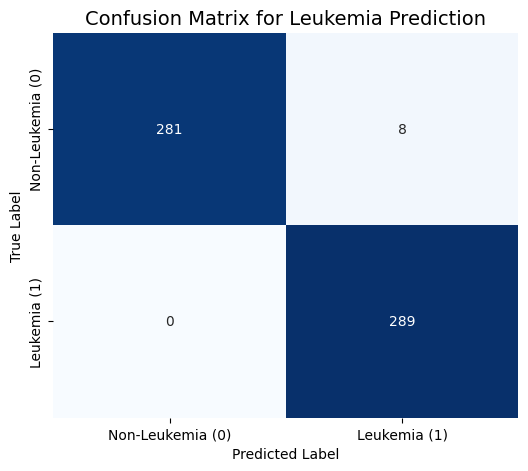

/tmp/ipython-input-2675884762.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette='viridis')


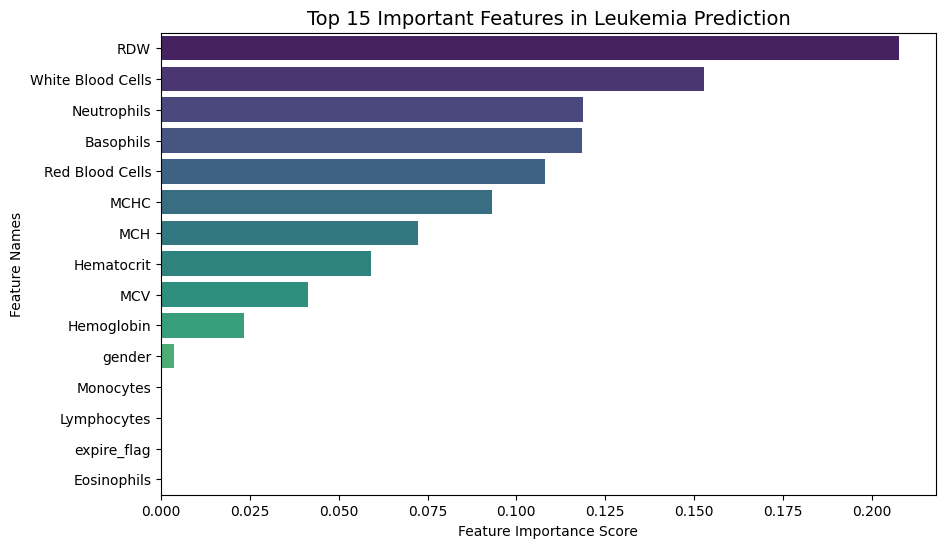

/tmp/ipython-input-2675884762.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=ax[0], palette='pastel')
/tmp/ipython-input-2675884762.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_bal, ax=ax[1], palette='pastel')


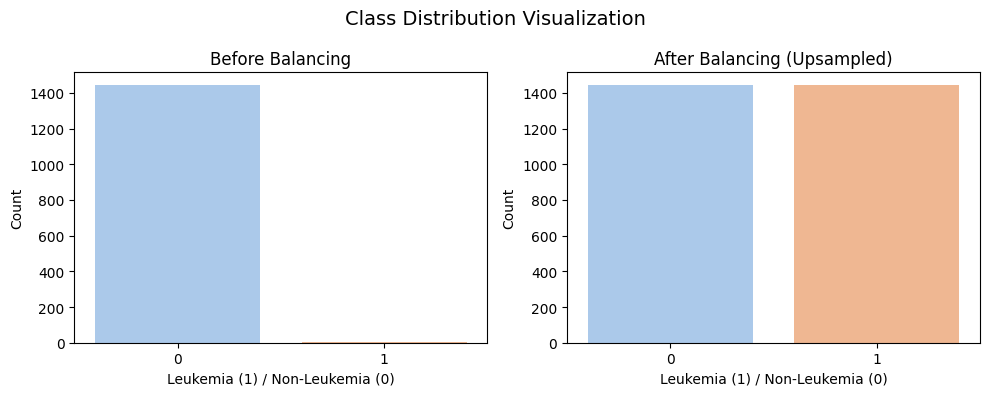

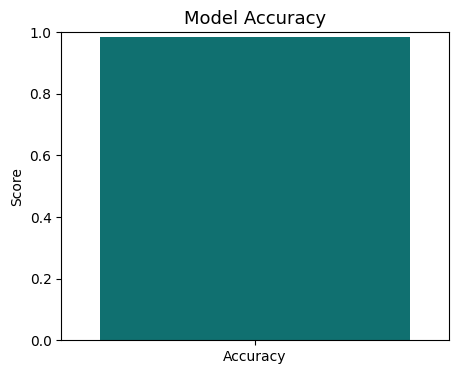

In [19]:
# ✅ Import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================================
# 🔹 1. Confusion Matrix Visualization
# ============================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Leukemia Prediction", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ["Non-Leukemia (0)", "Leukemia (1)"])
plt.yticks([0.5, 1.5], ["Non-Leukemia (0)", "Leukemia (1)"])
plt.show()

# ============================================
# 🔹 2. Feature Importance Plot
# ============================================
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette='viridis')
plt.title("Top 15 Important Features in Leukemia Prediction", fontsize=14)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.show()

# ============================================
# 🔹 3. Class Distribution (Before and After Balancing)
# ============================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Before balancing
sns.countplot(x=y, ax=ax[0], palette='pastel')
ax[0].set_title("Before Balancing", fontsize=12)
ax[0].set_xlabel("Leukemia (1) / Non-Leukemia (0)")
ax[0].set_ylabel("Count")

# After balancing
sns.countplot(x=y_bal, ax=ax[1], palette='pastel')
ax[1].set_title("After Balancing (Upsampled)", fontsize=12)
ax[1].set_xlabel("Leukemia (1) / Non-Leukemia (0)")
ax[1].set_ylabel("Count")

plt.suptitle("Class Distribution Visualization", fontsize=14)
plt.tight_layout()
plt.show()

# ============================================
# 🔹 4. Accuracy Comparison Bar Chart (Optional)
# ============================================
plt.figure(figsize=(5, 4))
sns.barplot(x=["Accuracy"], y=[accuracy_score(y_test, y_pred)], color='teal')
plt.ylim(0, 1)
plt.title("Model Accuracy", fontsize=13)
plt.ylabel("Score")
plt.show()


In [27]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(clf, "leukemia_rf_model.pkl")

print("✅ Model saved successfully as leukemia_rf_model.pkl")


✅ Model saved successfully as leukemia_rf_model.pkl


In [21]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.4 MB/s eta 0:00:00


In [28]:
import streamlit as st


In [29]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model
model = joblib.load("leukemia_rf_model.pkl")

st.title("🩸 Leukemia Prediction Using CBC Parameters")

st.markdown("Enter patient CBC values below to predict leukemia:")

# Example input fields
gender = st.selectbox("Gender", ("Male", "Female"))
WBC = st.number_input("WBC Count (×10^9/L)", min_value=0.0)
RBC = st.number_input("RBC Count (×10^12/L)", min_value=0.0)
Hemoglobin = st.number_input("Hemoglobin (g/dL)", min_value=0.0)
Platelet = st.number_input("Platelet Count (×10^9/L)", min_value=0.0)
MCV = st.number_input("Mean Corpuscular Volume (fL)", min_value=0.0)
MCH = st.number_input("Mean Corpuscular Hemoglobin (pg)", min_value=0.0)
MCHC = st.number_input("Mean Corpuscular Hemoglobin Concentration (g/dL)", min_value=0.0)

# Convert gender to numeric
gender = 0 if gender == "Male" else 1

# Create DataFrame for prediction
input_data = pd.DataFrame({
    'gender': [gender],
    'WBC': [WBC],
    'RBC': [RBC],
    'Hemoglobin': [Hemoglobin],
    'Platelet': [Platelet],
    'MCV': [MCV],
    'MCH': [MCH],
    'MCHC': [MCHC]
})

if st.button("Predict"):
    prediction = model.predict(input_data)[0]
    if prediction == 1:
        st.error("🔴 Leukemia Detected! Please consult a specialist.")
    else:
        st.success("🟢 No Leukemia Detected.")


2025-11-13 08:40:41.078 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 08:40:41.416 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-13 08:40:41.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 08:40:41.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 08:40:41.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 08:40:41.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 08:40:41.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 08:40:41.436 Thread 'MainThread': mi

In [30]:
import os
print(os.listdir())


['.config', 'leukemia_rf_model.pkl', 'cbc_leukemia_dataset.csv', 'sample_data']


In [31]:
pip install streamlit


In [33]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [34]:
import streamlit as st

st.title("✅ Streamlit is Working!")
st.write("If you can see this, Streamlit is correctly installed and running.")


2025-11-13 09:04:10.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 09:04:11.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 09:04:11.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 09:04:11.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 09:04:11.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 09:04:11.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
